# <center><font color='#d59bf6'>**Coin market analysis**</font>

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import mysql.connector

pd.options.display.float_format = '${:,.2f}'.format

In [2]:
# Connect to database
def read_from_db(coin_name):
  mydb = mysql.connector.connect(
            host="localhost",
            database="mysqldb",
            user="root",
            password="ba4569852",
            port=3308
      )

  cursor = mydb.cursor()

  cursor.execute(f'SELECT name, symbol, date, open, high, low, close, volume FROM {coin_name}')

  coin_data = cursor.fetchall()
  coin_data = zip(*coin_data)

  cols = ['name', 'symbol', 'date', 'open', 'high', 'low', 'close', 'volume']

  df = pd.DataFrame(columns=cols)
  
  for col, data in zip(cols, coin_data):
    df[col] = data

  return df

## <font color='#a56cc1'>**Load Data**</font>

In [3]:
bitcoin_df = read_from_db('Bitcoin')
ethereum_df = read_from_db('Ethereum')
tether_df = read_from_db('Tether')
litecoin_df = read_from_db('Litecoin')

## <font color='#a56cc1'>**Understanding Data**</font>

In [4]:
bitcoin_df.columns

Index(['name', 'symbol', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [5]:
# Convert column 'date' to datetime
# Convert columns 'open', 'high', 'low', 'close', 'volume' to float
def preprocessor(df):
  cols = ['date', 'open', 'high', 'low', 'close', 'volume']

  df[cols[0]] = pd.to_datetime(df[cols[0]], format=r'%Y-%m-%d')

  for col in cols[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
  
  return df

In [6]:
bitcoin_df = preprocessor(bitcoin_df)
ethereum_df = preprocessor(ethereum_df)
tether_df = preprocessor(tether_df)
litecoin_df = preprocessor(litecoin_df)

In [7]:
bitcoin_df.head()

,name,symbol,date,open,high,low,close,volume
0,Bitcoin,BTC-USD,2021-07-06,33763.74,34815.72,33759.96,34763.99,2.579645e+10
1,Bitcoin,BTC-USD,2021-07-05,35284.34,35284.34,33213.66,33746.00,2.672155e+10
2,Bitcoin,BTC-USD,2021-07-04,34665.57,35937.57,34396.48,35287.78,2.492431e+10
3,Bitcoin,BTC-USD,2021-07-03,33854.42,34909.26,33402.70,34668.55,2.438396e+10
4,Bitcoin,BTC-USD,2021-07-02,33549.60,33939.59,32770.68,33897.05,3.872897e+10


In [8]:
bitcoin_df.shape == ethereum_df.shape == tether_df.shape == litecoin_df.shape

True

In [9]:
# Check the data dimensions
bitcoin_df.shape

(366, 8)

In [10]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    366 non-null    object        
 1   symbol  366 non-null    object        
 2   date    366 non-null    datetime64[ns]
 3   open    363 non-null    float64       
 4   high    363 non-null    float64       
 5   low     363 non-null    float64       
 6   close   363 non-null    float64       
 7   volume  363 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 23.0+ KB


In [11]:
bitcoin_df.isnull().sum()

name      0
symbol    0
date      0
open      3
high      3
low       3
close     3
volume    3
dtype: int64

## <font color='#a56cc1'>**Data Cleaning and Preparation**</font>

In [12]:
def fill_null_value(df):
  cols = ['open', 'high', 'low', 'close', 'volume']

  for col in cols:
    df[col] = df[col].fillna(method='bfill')

  return df

bitcoin_df = fill_null_value(bitcoin_df)
ethereum_df = fill_null_value(ethereum_df)
tether_df = fill_null_value(tether_df)
litecoin_df = fill_null_value(litecoin_df)

In [13]:
bitcoin_df.isnull().sum()

name      0
symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

## <font color='#a56cc1'>**Data aggregation**</font>

In [14]:
bitcoin_df['date'] = bitcoin_df['date'].dt.date
ethereum_df['date'] = ethereum_df['date'].dt.date
tether_df['date'] = tether_df['date'].dt.date
litecoin_df['date'] = litecoin_df['date'].dt.date

In [53]:
# Bitcoin
bitcoin_group = pd.pivot_table(bitcoin_df, 
                               values=['close', 'volume'], 
                               index='date', 
                               aggfunc={'close': np.mean, 
                                        'volume': np.sum})

# Ehtereum
ethereum_group = pd.pivot_table(ethereum_df, 
                               values=['close', 'volume'], 
                               index='date', 
                               aggfunc={'close': np.mean, 
                                        'volume': np.sum})

# Tether
tether_group = pd.pivot_table(tether_df, 
                               values=['close', 'volume'], 
                               index='date', 
                               aggfunc={'close': np.mean, 
                                        'volume': np.sum})

# Litecoin
litecoin_group = pd.pivot_table(litecoin_df, 
                               values=['close', 'volume'], 
                               index='date', 
                               aggfunc={'close': np.mean, 
                                        'volume': np.sum})

bitcoin_group.shape

(366, 2)

## <font color='#a56cc1'>**Understanding the trends**</font>

In [16]:
btc_max = bitcoin_group['close'].max()
eth_max = ethereum_group['close'].max()
tet_max = tether_group['close'].max()
ltc_max = litecoin_group['close'].max()

#What is the highest closing value of Bitcoin and when
print("Highest average value of BTC ", btc_max, "was recorded on ", bitcoin_group[bitcoin_group['close'] == btc_max].index.values[0])

#What is the highest closing value of Ethereum and when
print("Highest average value of ETH ", eth_max, "was recorded on ", ethereum_group[ethereum_group['close'] == eth_max].index.values[0])

#What is the highest closing value of Tether and when
print("Highest average value of USDT ", tet_max, "was recorded on ", tether_group[tether_group['close'] == tet_max].index.values[0])

#What is the highest closing value of Litecoin and when
print("Highest average value of LTC ", ltc_max, "was recorded on ", litecoin_group[litecoin_group['close'] == ltc_max].index.values[0])

Highest average value of BTC  63503.46 was recorded on  2021-04-13
Highest average value of ETH  4168.7 was recorded on  2021-05-11
Highest average value of USDT  1.0202 was recorded on  2020-08-13
Highest average value of LTC  386.45 was recorded on  2021-05-09


In [17]:
btc_max = bitcoin_group['volume'].max()
eth_max = ethereum_group['volume'].max()
tet_max = tether_group['volume'].max()
ltc_max = litecoin_group['volume'].max()

#What is the highest closing volume of Bitcoin and when
print("Highest volume of BTC ", btc_max, "was recorded on ", bitcoin_group[bitcoin_group['volume'] == btc_max].index.values[0])

#What is the highest closing volume of Ethereum and when
print("Highest volume of ETH ", eth_max, "was recorded on ", ethereum_group[ethereum_group['volume'] == eth_max].index.values[0])

#What is the highest closing volume of Tether and when
print("Highest volume of USDT ", tet_max, "was recorded on ", tether_group[tether_group['volume'] == tet_max].index.values[0])

#What is the highest closing volume of Litecoin and when
print("Highest volume of LTC ", ltc_max, "was recorded on ", litecoin_group[litecoin_group['volume'] == ltc_max].index.values[0])

Highest volume of BTC  350967941479.0 was recorded on  2021-02-26
Highest volume of ETH  84482912776.0 was recorded on  2021-05-19
Highest volume of USDT  279067455600.0 was recorded on  2021-05-19
Highest volume of LTC  17994263494.0 was recorded on  2021-01-11


In [18]:
btc = bitcoin_group[bitcoin_group['volume'] == bitcoin_group['volume'].max()]['close'].values[0]
eth = ethereum_group[ethereum_group['volume'] == ethereum_group['volume'].max()]['close'].values[0]
tet = tether_group[tether_group['volume'] == tether_group['volume'].max()]['close'].values[0]
ltc = litecoin_group[litecoin_group['volume'] == litecoin_group['volume'].max()]['close'].values[0]

#What is the closing value of Bitcoin and when the highest volume was transacted 
print("Highest volume of BTC was", bitcoin_group['volume'].max(),"and mean closing value on that day was", btc)

#What is the highest closing volume of Ethereum and when
print("Highest volume of ETH was", ethereum_group['volume'].max(),"and mean closing value on that day was ", eth)

#What is the highest closing volume of Tether and when
print("Highest volume of USDT was", tether_group['volume'].max(),"and mean closing value on that day was ", tet)

#What is the highest closing volume of Litecoin and when
print("Highest volume of LTC was", litecoin_group['volume'].max(),"and mean closing value on that day was ", ltc)

Highest volume of BTC was 350967941479.0 and mean closing value on that day was 46339.76
Highest volume of ETH was 84482912776.0 and mean closing value on that day was  2460.68
Highest volume of USDT was 279067455600.0 and mean closing value on that day was  1.0016
Highest volume of LTC was 17994263494.0 and mean closing value on that day was  139.25


In [19]:
#What is the closing value of Bitcoin and when the highest volume was transacted 
print("Lowest average closing value of BTC ", bitcoin_group['close'].min())

#What is the closing value of Ethereum and when the highest volume was transacted 
print("Lowest average closing value of ETH ", ethereum_group['close'].min())

#What is the closing value of Tether and when the highest volume was transacted 
print("Lowest average closing value of USDT ", tether_group['close'].min())

#What is the closing value of Litecoin and when the highest volume was transacted 
print("Lowest average closing value of LTC ", litecoin_group['close'].min())

Lowest average closing value of BTC  9132.23
Lowest average closing value of ETH  232.77
Lowest average closing value of USDT  0.997
Lowest average closing value of LTC  41.91


In [20]:
def candlestick_chart(df):
  fig = go.Figure(data=[go.Candlestick(x=df['date'],
                                       open=df['open'],
                                       high=df['high'],
                                       low=df['low'],
                                       close=df['close'])])
  
  fig.update_layout(xaxis_rangeslider_visible=False)                                     
  fig.show()

In [21]:
candlestick_chart(bitcoin_df)

In [22]:
candlestick_chart(ethereum_df)

In [23]:
candlestick_chart(tether_df)

In [24]:
candlestick_chart(litecoin_df)

## <font color='#a56cc1'>**Analysing the combined trends**</font>

In [56]:
data = {'Bitcoin': bitcoin_df, 'Ethereum': ethereum_df, 'Tether': tether_df, 'Litecoin':litecoin_df}

fig = go.Figure()

for name, df in data.items():
  fig.add_trace(go.Scatter(x=df['date'], 
                           y=df['close'], 
                           name=name))

fig.update_yaxes(type="log")
fig.update_layout(title='Comparision of cryptocurrency values through 2020', 
                  legend_title='Cryptocurrencies')
fig.show()

In [49]:
data = {'Bitcoin': bitcoin_df, 'Ethereum': ethereum_df, 'Tether': tether_df, 'Litecoin':litecoin_df}

fig = go.Figure()

for name, df in data.items():
  fig.add_trace(go.Scatter(x=df['date'], 
                           y=df['volume'], 
                           name=name))

fig.update_layout(title='Comparision of cryptocurrency volume by day through 2020', 
                  legend_title='Cryptocurrencies')
fig.show()

## <font color='#a56cc1'>**Correlation**</font>

In [60]:
# Merge bitcoin and ethereum data
btc_eth = pd.merge(bitcoin_group, ethereum_group, suffixes=('_btc', '_eth'), left_index=True, right_index=True)
btc_eth.head()

,close_btc,volume_btc,close_eth,volume_eth
date,,,,
2020-07-06,9375.47,1.788926e+10,241.51,8.782918e+09
2020-07-07,9252.28,1.383965e+10,239.08,6.441498e+09
2020-07-08,9428.33,1.970236e+10,246.67,9.892586e+09
2020-07-09,9277.97,1.800070e+10,243.02,8.429099e+09
2020-07-10,9278.81,1.686004e+10,240.98,7.281371e+09


In [62]:
# Merge with tether data
btc_eth_tet = pd.merge(btc_eth, tether_group,  left_index=True, right_index=True)
btc_eth_tet = btc_eth_tet.rename(columns={'close': 'close_tet', 'volume': 'volume_tet'})
btc_eth_tet.head()

,close_btc,volume_btc,close_eth,volume_eth,close_tet,volume_tet
date,,,,,,
2020-07-06,9375.47,1.788926e+10,241.51,8.782918e+09,1.0002,2.851382e+10
2020-07-07,9252.28,1.383965e+10,239.08,6.441498e+09,0.9992,2.026276e+10
2020-07-08,9428.33,1.970236e+10,246.67,9.892586e+09,0.9999,2.852024e+10
2020-07-09,9277.97,1.800070e+10,243.02,8.429099e+09,1.0031,2.455968e+10
2020-07-10,9278.81,1.686004e+10,240.98,7.281371e+09,1.0000,1.941631e+10


In [63]:
# Merge with litecoin data
btc_eth_tet_ltc = pd.merge(btc_eth_tet, litecoin_group,  left_index=True, right_index=True)
btc_eth_tet_ltc = btc_eth_tet_ltc.rename(columns={'close': 'close_ltc', 'volume': 'volume_ltc'})
btc_eth_tet_ltc.head()

,close_btc,volume_btc,close_eth,volume_eth,close_tet,volume_tet,close_ltc,volume_ltc
date,,,,,,,,
2020-07-06,9375.47,1.788926e+10,241.51,8.782918e+09,1.0002,2.851382e+10,43.96,1.743604e+09
2020-07-07,9252.28,1.383965e+10,239.08,6.441498e+09,0.9992,2.026276e+10,43.32,1.360984e+09
2020-07-08,9428.33,1.970236e+10,246.67,9.892586e+09,0.9999,2.852024e+10,45.20,2.161892e+09
2020-07-09,9277.97,1.800070e+10,243.02,8.429099e+09,1.0031,2.455968e+10,44.54,1.985306e+09
2020-07-10,9278.81,1.686004e+10,240.98,7.281371e+09,1.0000,1.941631e+10,44.25,1.840301e+09


In [64]:
#Corelation between the currencies
btc_eth_tet_ltc.corr()

,close_btc,volume_btc,close_eth,volume_eth,close_tet,volume_tet,close_ltc,volume_ltc
close_btc,1.000000,0.596909,0.844191,0.652916,-0.129746,0.755214,0.936477,0.477008
volume_btc,0.596909,1.000000,0.469386,0.708955,-0.089804,0.764269,0.570006,0.655108
close_eth,0.844191,0.469386,1.000000,0.746052,-0.128925,0.728090,0.927669,0.326115
volume_eth,0.652916,0.708955,0.746052,1.000000,-0.072970,0.908864,0.738382,0.636211
close_tet,-0.129746,-0.089804,-0.128925,-0.072970,1.000000,-0.070466,-0.135072,-0.118596
volume_tet,0.755214,0.764269,0.728090,0.908864,-0.070466,1.000000,0.823079,0.761073
close_ltc,0.936477,0.570006,0.927669,0.738382,-0.135072,0.823079,1.000000,0.537607
volume_ltc,0.477008,0.655108,0.326115,0.636211,-0.118596,0.761073,0.537607,1.000000


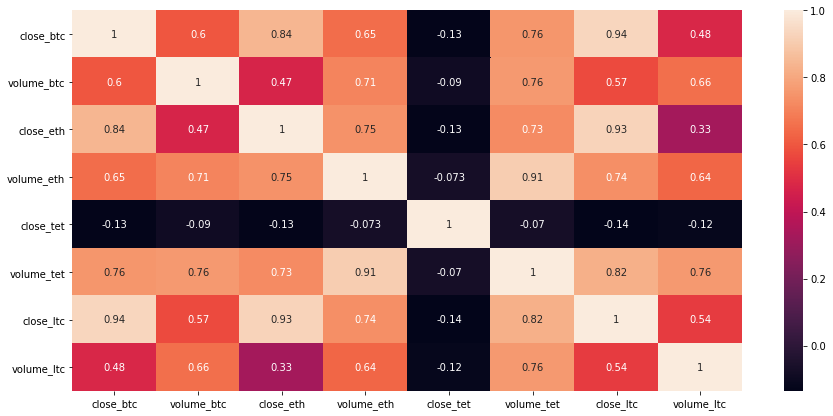

In [69]:
plt.figure(figsize=(15, 7))
sns.heatmap(btc_eth_tet_ltc.corr(), annot=True)
plt.show()

## <font color='#a56cc1'>**Data Perdiction**</font>

<font color='red'>Upcoming soon</font>